# 1. Get Toy Data
- Let's generate a simple toy data set representing web-session data
    - with 3 different classes
    - with simple intuitive features
        - Other than some super simple dummy-encoding of categoricals, we won't go into feature engineering

imports

In [35]:
# for plottign
import matplotlib.pyplot as plt
# for data frame (i.e. table) manipulations
import pandas as pd
# to easily generate a data set with a classification signal in it
from sklearn.datasets import make_classification

notebook variables

In [10]:
# declare whether or not to print some feedback
verbose = True

I'd like to start with the following columns

In [17]:
# initialize a empty data frame
web_sesh_df = pd.DataFrame(
    # declare the column headers with empty columns for now
    data = {
        # hour of day (0-24) as float
        'start_time':[],
        # weekday (0-7) treat as int (although it should properly be understood as a categorical)
        'weekday':[],
        # boolean indicator of whether or not the session is on a chrome browser
        'chrome_broswer':[],
        # boolean indicator of whether or not the session is on a firefox browser
        'firefox_browser':[],
        # boolean indicator of whether or not the session is on a mobile device
        'mobile_device':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '1st_page_faq':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_search':[],
        # boolean indicator of whether or not the 1st page visited was
        '2nd_page_faq':[],
        # the last page a session interacted with; and the prediction target
        'TARGET_PAGE':[]
        
    }
)

# display the column headers
if verbose:
    print('Initialized web session data frame with info:\n')
    print(web_sesh_df.info())

Initialized web session data frame with info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       0 non-null      float64
 1   weekday          0 non-null      float64
 2   chrome_broswer   0 non-null      float64
 3   firefox_browser  0 non-null      float64
 4   mobile_device    0 non-null      float64
 5   1st_page_search  0 non-null      float64
 6   1st_page_faq     0 non-null      float64
 7   2nd_page_search  0 non-null      float64
 8   2nd_page_faq     0 non-null      float64
 9   TARGET_PAGE      0 non-null      float64
dtypes: float64(10)
memory usage: 124.0 bytes
None


## Ok, let's epxlore how `make_classification` works

In [65]:
# keep it simple with a 2d plottable data set
X,y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 23,
    n_clusters_per_class = 1,
    # keep the scale simple
    scale = 1.0,
    shuffle = True
)

In [60]:
# take a look at the first 5 samples
X[:5]

array([[-0.5928702 ,  1.22442221],
       [-1.24103977,  0.64394441],
       [-1.1208303 , -0.39350826],
       [-2.16975022, -0.13037409],
       [-2.02050512,  1.50618259]])

In [61]:
# take a look at the first 5 samples
X[:5, 0]

array([-0.5928702 , -1.24103977, -1.1208303 , -2.16975022, -2.02050512])

In [62]:
y[:5]

array([0, 0, 1, 0, 1])

In [66]:
# could put it into a df if I wanted to
toy_df = pd.DataFrame(
   data =  {
       # get every row, but the first column of X
       'feature_1': X[:,0],
       # get every row but the second col
       'feature_2': X[:,1],
       'BINARY_TARGET':y
   }
)
# display the toy data set
toy_df.head()

,feature_1,feature_2,BINARY_TARGET
0,-0.592870,1.224422,0
1,-1.241040,0.643944,0
2,-1.120830,-0.393508,1
3,-2.169750,-0.130374,0
4,-2.020505,1.506183,1


[]

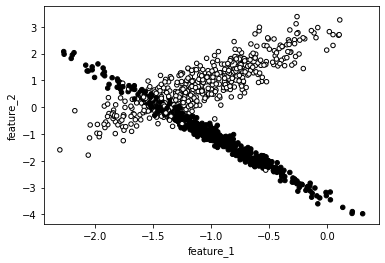

In [67]:
toy_df.plot.scatter(
    x = 'feature_1',
    y = 'feature_2',
    # set the color
    c = 'BINARY_TARGET',
    edgecolors = 'k',
    colorbar = False,
)
plt.plot()

## repeat with 2 clusters per class

In [68]:
# keep it simple with a 2d plottable data set
X,y = make_classification(
    n_samples = 1000,
    n_features = 2,
    n_redundant = 0,
    n_informative = 2,
    random_state = 23,
    n_clusters_per_class = 2,
    # keep the scale simple
    scale = 1.0,
    shuffle = True
)

In [69]:
# take a look at the first 5 samples
X[:5]

array([[-2.1146458 , -0.70968836],
       [-1.38231359, -0.84623523],
       [-0.40700518, -1.48291467],
       [ 0.7616193 , -0.55830075],
       [ 0.48685034, -1.46851746]])

In [70]:
# take a look at the first 5 samples
X[:5, 0]

array([-2.1146458 , -1.38231359, -0.40700518,  0.7616193 ,  0.48685034])

In [71]:
y[:5]

array([0, 0, 0, 1, 1])

In [72]:
# could put it into a df if I wanted to
toy_df = pd.DataFrame(
   data =  {
       # get every row, but the first column of X
       'feature_1': X[:,0],
       # get every row but the second col
       'feature_2': X[:,1],
       'BINARY_TARGET':y
   }
)
# display the toy data set
toy_df.head()

,feature_1,feature_2,BINARY_TARGET
0,-2.114646,-0.709688,0
1,-1.382314,-0.846235,0
2,-0.407005,-1.482915,0
3,0.761619,-0.558301,1
4,0.486850,-1.468517,1


[]

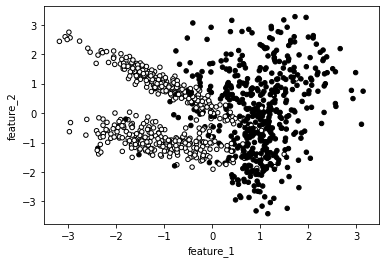

In [73]:
toy_df.plot.scatter(
    x = 'feature_1',
    y = 'feature_2',
    # set the color
    c = 'BINARY_TARGET',
    edgecolors = 'k',
    colorbar = False,
)
plt.plot()

## get on with it

In [ ]:
X,y = make_classification(
    # generate 100,000 rows
    n_samples = 100000,
    # set the number of features to the width of the data minus the target column
    n_features = web_sesh_df.shape[1] - 1,
    # let's assume all the columns are informative except for the browser features, so that's 7
    n_informative = 7,
    # declare number of target pages/classes to predict (keep it simple at 3)
    n_classes = 3,
    # declare the number of clusters per class
    n_clusters_per_class = 2
)